#### Zheng Wang


## Brain network model: Wong-wang Deco Model with BOLD


####    


n this notebook, we use the model in (Deco, _et al._ 2014. How local Excitation-Inhibition Ratio impacts the Whole brain Dynamics. J. neurosci. 34(23):7886-7898). In this paper, each neural node has two neural masses: one describes the average behavior of an excitatory subpopulation of neurons, and the other describes the average behavior of an inhibitory subpopulation. More precisely, the dynamics of each neural node are described by two state variables, denoted $S^E_i(t)$ and $S^I_i(t)$, which represent respectively the average excitatory and inhibitory synaptic gating variables at the neural node with index $i$. These state variables evolve according to the following coupled nonlinear stochastic differential equations:

\begin{align}
\frac{dS^E_i(t)}{dt} &= -\frac{S^E_i(t)}{\tau_E} +\big( 1-S^E_i(t) \big) \: \gamma \: r^E_i(t) + \sigma \: v_i(t) \\
\frac{dS^I_i(t)}{dt} &= -\frac{S^I_i(t)}{\tau_I} +r^I_i(t) + \sigma \: v_i(t) \\
\frac{q_i(t)}{dt} &= \frac{f_i(1.-(1.-\rho)^{\frac{1}{f_i}})}{\rho \tau_0} -\frac{q_iv_i^{\frac{1}{\alpha}-1}}{\tau_0} \\
\frac{v_i(t)}{dt} &= \frac{f_i -v_i^{\frac{1}{\alpha}}}{\tau_0} \\
\frac{f_i(t)}{dt} &= x_i \\
\frac{x_i(t)}{dt} &= E_i -\frac{x_i}{\tau_s} -\frac{f_i-1}{\tau_f}
\end{align}

where $v_i(t)$ is uncorrelated Gaussian noise of mean 0 and standard deviation 1, which, multiplied by parameter $\sigma$, becomes uncorrelated Gaussian noise of mean 0 and standard deviation $\sigma$. Also, $\tau_E$ and $\tau_I$ are the decay times of the excitatory and inhibitory synapses, respectively, and $\gamma$ is another kinetic parameter. Variables $r^E_i(t)$ and $r^I_i(t)$ represent the population firing rates of the excitatory and inhibitory populations, respectively, and are computed as follows:

\begin{align}
r^E_i(t) &= \frac{a_E \: I^E_i(t) -b_E}{1 -e^{-d_E \big(a_E \: I^E_i(t) -b_E \big)}} \\
r^I_i(t) &= \frac{a_I \: I^I_i(t) -b_I}{1 -e^{-d_I \big(a_I \: I^I_i(t) -b_I \big)}}
\end{align}

where $I^E_i(t)$ and $I^I_i(t)$ represent the input currents to the excitatory and inhibitory populations, respectively. Parameters $a_E$, $a_I$, $b_E$, $b_I$, $d_E$ and $d_I$ govern the specifics of the conversion of input currents to the population firing rates. The two input currents are computed as follows:

\begin{align}
I^E_i(t) &= tanh\left(W_E \: I_0 +w_+ \: J_{NMDA} \: S^E_i(t) + G \: J_{NMDA} \sum_j C_{ij} \: S^E_j(t) -J_i \: S^I_i(t) +I_{external} \right)\\
I^I_i(t) &= tanh\left(W_I \: I_0 +J_{NMDA} \: S^E_i(t) -S^I_i(t) +\lambda \: G \: J_{NMDA} \sum_j C_{ij} \: S^E_j(t)\right)
\end{align}

where $I_{external}$ encodes external stimulations, and is set to 0 when simulating resting state activity. $I_0$ represents a constant external input, scaled by parameters $W_E$ and $W_I$ for the excitatory and inhibitory populations, respectively. $C_{ij}$ denotes the elements of the structural connectivity matrix and expresses the neuroanatomical link between neural nodes $i$ and $j$. The term $\sum_j C_{ij} \: S^E_j$ thus encodes the long-range interactions between nodes, and parameter $\lambda$ allows to remove long-range feedforward inhibition when set to 0. Parameters $J_{NMDA}$ and $J_i$ represent the excitatory synaptic coupling and the local feedback inhibitory synaptic coupling, respectively, while parameters $w_+$ and $G$ scale the local and long-range excitatory couplings, respectively.




This new notation is convenient because we will eventually fit these four parameters by comparing the results of simulations of the model to empirical data. Naming the strengths of the local and global couplings between neural masses in a simple and explicit way will allow us to interpret the fitted parameters in a straightforward way. The following equations allows to retrieve the parameters used in the paper from the parameters that we use in the present notebook:

\begin{align}
J_i &= g_{IE} \\
J_{NMDA} &= g_{EI} \\
w_+ &= \frac{g_{EE}}{g_{EI}} \\
G &= \frac{g}{g_{EI}}
\end{align}

The output $y = E -I$.

The parameters $g,  g_{EE}, g_{IE}, g_{EI}$.

Sensitivity with respective to model parameters is 

The states are $Edg, Idg Edg_{EE}, Idg_{EE}, Edg_{IE}, Idg_{IE}, Edg_{EI}, Idg_{EI}$.

\begin{align}
\frac{dEdg}{dt} &= c_E\mathrm{L}E +dEdI*Idg +dEdE*Edg +c_Egl_sEdg\\
\frac{dIdg}{dt} &= +dIdE*Edg + dIdI*Idg
\end{align}

\begin{align}
\frac{dEdg_{EE}}{dt} &= c_EE +dEdI*Idg_{EE} +dEdE*Edg_{EE} +c_E*gl_sEdg_{EE}\\
\frac{dIdg_{EE}}{dt} &= IdE*Edg_{EE} + dIdI*Idg_{EE}
\end{align}

\begin{align}
\frac{dEdg_{EI}}{dt} &= - c_EI +dEdI*Idg_{EI} +dEdE*Edg_{EI} +c_Egl_sEdg_{EI}\\
\frac{dIdg_{EI}}{dt} &= IdE*Edg_{EI} + dIdI*Idg_{EI}
\end{align}

\begin{align}
\frac{dEdg_{IE}}{dt} &= 0 +dEdI*Idg_{IE} +dEdE*Edg_{IE} +c_Egl_sEdg_{IE}\\
\frac{dIdg_{IE}}{dt} &= c_I E++dIdE*Edg_{IE} + dIdI*Idg_{IE}
\end{align}

\begin{align}
\frac{dEdsig}{dt} &= 0 +dEdI*Idsig +dEdE*Edsig +c_E*gl_sEdsig+w\\
\frac{dIdg_{IE}}{dt} &= c_I E++dIdE*Edsig + dIdI*Idsig
\end{align}

where $w$ is noise and 
\begin{align}
dEdE &= -1.0/\tau_E -\gamma_E*rE + c_E*g_{EE} \\
dEdI &= -c_E*g_{IE} \\
dIdE &= c_I*g_{EI} \\
dIdI &= -1./\tau_I -c_I \\
c_E &= (1. -E)\gamma_Edh_tf(aE, bE, dE, IE)/\cosh(IE_nocons)^2\\
c_I &= \gamma_Idh_tf(aI, bI, dI, II)/\cosh(II_nocons)^2
\end{align}
Conditions on stability of sensitivity model:
\begin{align}
g_{EE} +g_{IE} &< 0.3 \\
g_{EI} & < 1.0
\end{align}

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
import sys
sys.path.append("/brunhild/mcintosh_lab/jwang/git_Lab/WWD_Model/Model/")
sys.path.append("/brunhild/mcintosh_lab/jwang/git_Lab/WWD_Model/ParamAnalysis/")
import WWD_model
import ParamAnalysis

In [3]:

####################
### change below for your data



subID_file_control = '/alkeste/mcintosh_lab/lrokos/tvb_baby/code/subIDs_4YR_controls.txt'
subID_file_pre = '/alkeste/mcintosh_lab/lrokos/tvb_baby/code/subIDs_4YR_preterm.txt'
SC_dir_pre= '/alkeste/mcintosh_lab/lrokos/tvb_baby/test_dti/sub-'
SC_dir_post = '/ses-1/dwi/results/RM/defaults/SCmats_defaults.mat'
TS_dir_pre= '/alkeste/mcintosh_lab/aeasson/kspipe/babyTVB_0606/bold_prep/_subject_'
TS_dir_post = '/computeFC/TS.txt'
out_dir =  '/liberatrix/mcintosh_lab/jwang/ModelFitting/babyTVB/DecoAdam/' #'/brunhild/mcintosh_lab/jwang/ModelFitting/Linear_gains/'

dataset = 'babyTVB'

import pandas as pd
subIDs_con = pd.read_csv(subID_file_control, sep=" ", header=None)
subIDs_pre = pd.read_csv(subID_file_pre, sep=" ", header=None)
subIDs_list = []
for i in range(subIDs_con.shape[0]):
    subIDs_list.append(subIDs_con.values[i,0][4:])
for i in range(subIDs_pre.shape[0]):
    subIDs_list.append(subIDs_pre.values[i,0][4:])

13Cg1111134YR
chain:0


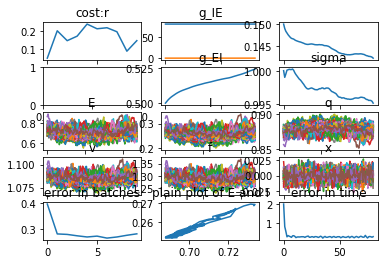

AttributeError: 'list' object has no attribute 'T'

In [54]:
import os

sub =subIDs_list[0]
print(sub)
SC_file = SC_dir_pre + sub + SC_dir_post
TS_file = TS_dir_pre + sub + TS_dir_post
if os.path.isfile(SC_file) and os.path.isfile(TS_file):
    SC_data= scipy.io.loadmat(SC_file)
    SC = SC_data['probConnect']
    TS= np.loadtxt(TS_file)
    TS =(TS.T -TS.T.mean(axis= 0)).T ### demean across ROIs on ts
    SC = (SC+SC.T)*0.5

    #### threshold on your SC if needed
    SC1=SC[:48,:48].copy()
    SC2=SC[48:96,48:96].copy()
    SC3=SC[:48,48:96].copy()
    mask1 = (SC1-SC1.mean(axis=1)< .5*SC1.std(axis=1)) 
    SC1[mask1]=0
    SC2[(SC2-SC2.mean(axis=1) <  0.5*SC2.std(axis=1)) ]=0
    SC3[(SC3-SC3.mean(axis=1)<  0.5*SC3.std(axis=1)) ]=0
    SC[:48,:48] = SC1
    SC[48:96,48:96] = SC2
    SC[:48,48:96] = 1*SC3
    SC[48:96,:48] = 1*SC3.T
    """mask =  (SC-SC.mean(axis=1)< 0.0*SC.std(axis=1)) 
    SC[mask] = 0"""

    # We use the logarithm to decrease the values of the weights
    w = np.log1p(SC)/np.linalg.norm(np.log1p(SC))
    #ts = TS#ts -ts.min()
    ts =TS ### due to model limit you have to shrink you empirical ts to certain range
    exp_dt = 3.0              # time interval between two data points

    md_wwd = WWD_model.WongWangDeco(w, ts, exp_dt)
    total_t = exp_dt*len(ts)  # total time length of the time series



    batch_size = 15
    epoch_num = 10
    alpha = 0.001
else:
    print("data is missing")
    
# in order to see the stability of the fitted parameteres we model 4 times for each 
num_chain = 4


for i in range(num_chain):
    print('chain:'+ str(i))
    
    cost, theta, states, errors, e_ep = md_wwd.deco_train(batch_size, epoch_num, alpha)
        
    
        
    fig, ax = plt.subplots(5,3)

    ax[0,0].plot(cost)
    ax[0,0].set_title('cost:r')
    ax[0,1].plot(theta[:,0])
    ax[0,1].set_title(md_wwd.theta_name[0])
    ax[0,2].plot(theta[:,1])
    ax[0,1].set_title(md_wwd.theta_name[1])
    ax[0,1].plot(theta[:,2])
    ax[0,1].set_title(md_wwd.theta_name[2])
    ax[1,1].plot(theta[:,3])
    ax[1,1].set_title(md_wwd.theta_name[3])
    
    ax[1,2].plot(theta[:,4])
    ax[1,2].set_title(md_wwd.theta_name[4])
    ax[2,0].plot(states[:,0,:])
    ax[2,0].set_title(md_wwd.state_name[0])
    ax[2,1].plot(states[:,1,:])
    ax[2,1].set_title(md_wwd.state_name[1])
    ax[2,2].plot(states[:,2,:])
    ax[2,2].set_title(md_wwd.state_name[2])
    ax[3,0].plot(states[:,3,:])
    ax[3,0].set_title(md_wwd.state_name[3])
    ax[3,1].plot(states[:,4,:])
    ax[3,1].set_title(md_wwd.state_name[4])
    ax[3,2].plot(states[:,5,:])
    ax[3,2].set_title(md_wwd.state_name[5])
    ax[4,0].plot(e_ep)
    ax[4,0].set_title('error in batches')
    ax[4,1].plot(states[:,0,:].mean(1), states[:,1,:].mean(1))
    ax[4,1].set_title('plain plot of E and I')
    ax[4,2].plot(errors)
    ax[4,2].set_title('error in time')



    plt.show()

    results_sim, Es_sim, Is_sim = md_wwd.deco_test(1200)
    np.savetxt(out_dir+'babyTVB_'+sub+'_chain_'+str(i)+'_parameters.txt', theta)
    np.savetxt(out_dir+'babyTVB_'+sub+'_chain_'+str(i)+'_sim_bold.txt', results_sim.T)
    np.savetxt(out_dir+'babyTVB_'+sub+'_chain_'+str(i)+'_sim_I.txt', Is_sim.T)
    np.savetxt(out_dir+'babyTVB_'+sub+'_chain_'+str(i)+'_sim_E.txt', Es_sim.T)
    fc_exp = np.corrcoef(ts.T)
    fc_sim = np.corrcoef(results_sim[10:].T)

    print("Pearson's correlation coefficient between the experimental and simulated FCs: %.4f" 
         %np.corrcoef(fc_exp[np.tril_indices(ROI_num,-1)], fc_sim[np.tril_indices(ROI_num,-1)])[0,1])

    print("Euclidian distance between the bottom triangle of the experimental and simulated FCs: %.4f" 
         %np.sqrt(((fc_exp[np.tril_indices(ROI_num,-1)] -fc_sim[np.tril_indices(ROI_num,-1)])**2).mean()))


    fig, ax = plt.subplots(2,3, figsize=(12,8))

    # norm = mpl.colors.Normalize(vmin=min(np.min(fc_sim), np.min(fc_exp)), vmax=max(np.max(fc_sim), np.max(fc_exp)))
    # fc_exp_plot = ax[0].imshow(fc_exp, cmap='bwr', norm=norm)
    # fc_sim_plot = ax[1].imshow(fc_sim, cmap='bwr', norm=norm)

    fc_exp_plot = ax[0,0].imshow(fc_exp, cmap='bwr')
    ax[0,0].set_title('empFC')
    fc_sim_plot = ax[0,1].imshow(fc_sim-np.diag(np.diag(fc_sim)), cmap='bwr') #-np.diag(np.diag(fc_sim))
    ax[0,1].set_title('simFC')

    ax[1,0].plot(ts)
    ax[1,0].set_title('empBOLD')
    ax[1,1].plot(results_sim)
    ax[1,1].set_title('simBOLD')
    ax[1,2].plot(Es_sim)
    ax[1,2].set_title('simE')

    ax[0,0].set_ylabel('Neural node number', fontsize=24)
    #ax[0].set_xlabel('Neural node number', fontsize=24)
    ax[0,1].set_xlabel('Neural node number', fontsize=24)
    ax[0,0].tick_params(labelsize=20)
    ax[0,1].tick_params(labelsize=20)
    ax[0,2].plot(np.array(Es_sim).mean(1), np.array(Is_sim).mean(1))
    ax[0,2].set_title('plain plot of E and I')

    plt.show()

In [4]:
out_dir =  '/liberatrix/mcintosh_lab/jwang/ModelFitting/babyTVB/DecoAdam/'
sub =subIDs_list[0]

params_chain_1 = np.loadtxt(out_dir+'babyTVB_'+sub+'parameters_chain0_smallstep.txt')
params_chain_2 = np.loadtxt(out_dir+'babyTVB_'+sub+'parameters_chain1_smallstep.txt')
params_chain_3 = np.loadtxt(out_dir+'babyTVB_'+sub+'parameters_chain2_smallstep.txt')
params_chain_4 = np.loadtxt(out_dir+'babyTVB_'+sub+'parameters_chain3_smallstep.txt')

In [12]:
k=50
params_names=['g','g_EE', 'g_IE', 'g_EI', 'sigma']

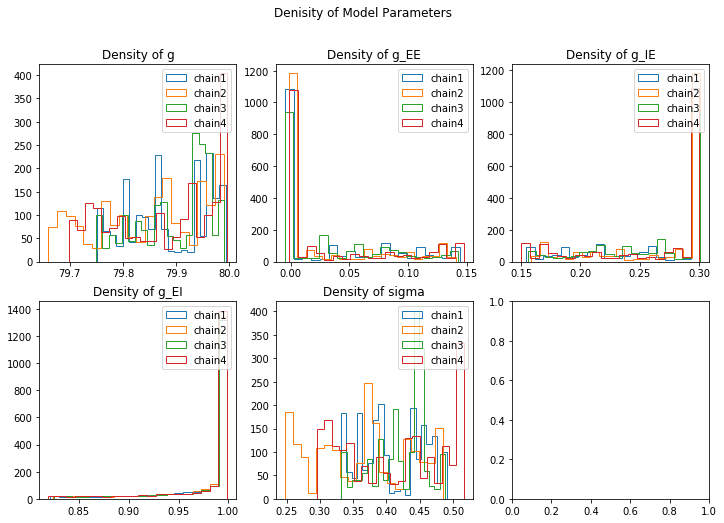

In [7]:
fig, ax = plt.subplots(2,3, figsize=(12,8))
for i in range(5):
    ax[i//3, i%3].hist(params_chain_1[k:,i], bins = 20, histtype= 'step' )
    ax[i//3, i%3].hist(params_chain_2[k:,i], bins = 20, histtype= 'step' )
    ax[i//3, i%3].hist(params_chain_3[k:,i], bins = 20, histtype= 'step' )
    ax[i//3, i%3].hist(params_chain_4[k:,i], bins = 20, histtype= 'step' )
    ax[i//3, i%3].set_title('Density of '+ params_names[i])
    ax[i//3, i%3].legend(['chain1', 'chain2', 'chain3', 'chain4'])
plt.suptitle('Denisity of Model Parameters')
plt.show()

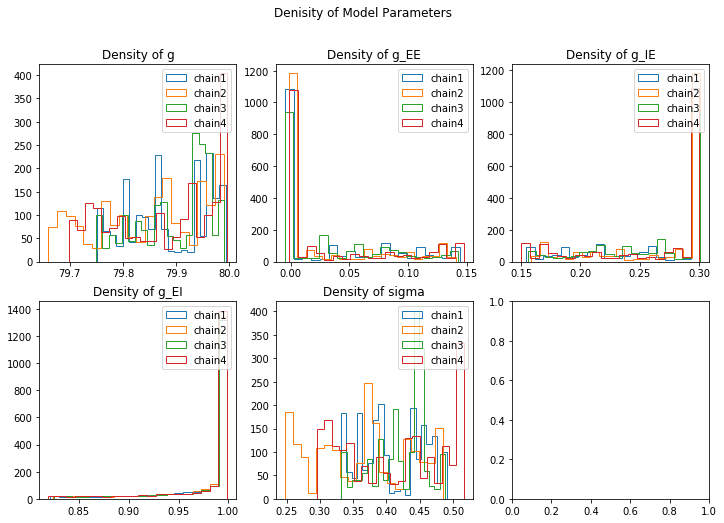

In [8]:
fig, ax = plt.subplots(2,3, figsize=(12,8))
for i in range(5):
    ax[i//3, i%3].hist(params_chain_1[k:,i], bins = 20, histtype= 'step' )
    ax[i//3, i%3].hist(params_chain_2[k:,i], bins = 20, histtype= 'step' )
    ax[i//3, i%3].hist(params_chain_3[k:,i], bins = 20, histtype= 'step' )
    ax[i//3, i%3].hist(params_chain_4[k:,i], bins = 20, histtype= 'step' )
    ax[i//3, i%3].set_title('Density of '+ params_names[i])
    ax[i//3, i%3].legend(['chain1', 'chain2', 'chain3', 'chain4'])
plt.suptitle('Denisity of Model Parameters')
plt.show()

In [9]:
param_chains = np.array([params_chain_2[k+1:], params_chain_3[k+1:], params_chain_1[k+1:], params_chain_4[k+1:]]) 
R=ParamAnalysis.R_stat(param_chains)
print(R)

[1.0830962  1.00590664 1.00738253 1.0009966  1.26505803]
